<a href="https://colab.research.google.com/github/leeIITM/AI-X-HORIZON/blob/main/GRU_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn as nn

In [7]:
file="/content/drive/MyDrive/Sunspots.csv"

In [8]:
df=pd.read_csv(file)
df
df.drop("Unnamed: 0",axis=1)

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7
...,...,...
3260,2020-09-30,0.6
3261,2020-10-31,14.4
3262,2020-11-30,34.0
3263,2020-12-31,21.8


In [9]:
df.isnull().sum()

Unnamed: 0                           0
Date                                 0
Monthly Mean Total Sunspot Number    0
dtype: int64

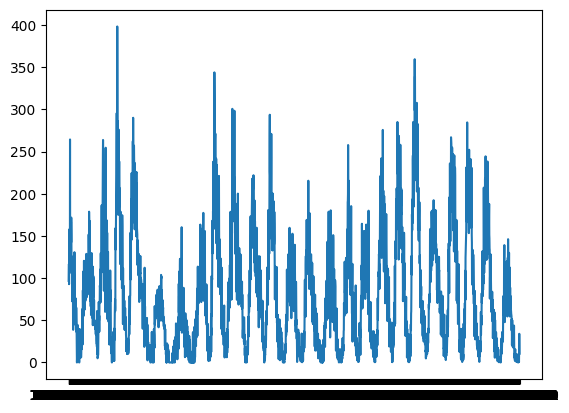

In [10]:
plt.plot(df["Date"],df["Monthly Mean Total Sunspot Number"])

In [11]:
def split_sequence(sequence, n_steps):
  x,y=[],[]
  for i in range(len(sequence)):
    end_ix=i+n_steps
    if end_ix>len(sequence)-1:
      break
    seq_x,seq_y=sequence[i:end_ix],sequence[end_ix]
    x.append(seq_x)
    y.append(seq_y)
  return np.array(x),np.array(y)

In [12]:
number = df['Monthly Mean Total Sunspot Number']
number = number.to_numpy()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
number_scaled = scaler.fit_transform(number.reshape(-1, 1))
print(number_scaled)

[[0.24284279]
 [0.26192868]
 [0.29306881]
 ...
 [0.08538423]
 [0.05474636]
 [0.02611753]]


In [13]:
x,y = split_sequence(number_scaled, 5)
print(x)
print(y)
print(x.shape)
print(y.shape)

[[[0.24284279]
  [0.26192868]
  [0.29306881]
  [0.23304872]
  [0.35585133]]

 [[0.26192868]
  [0.29306881]
  [0.23304872]
  [0.35585133]
  [0.34957308]]

 [[0.29306881]
  [0.23304872]
  [0.35585133]
  [0.34957308]
  [0.39678553]]

 ...

 [[0.01456554]
  [0.01531894]
  [0.01883476]
  [0.00150678]
  [0.03616273]]

 [[0.01531894]
  [0.01883476]
  [0.00150678]
  [0.03616273]
  [0.08538423]]

 [[0.01883476]
  [0.00150678]
  [0.03616273]
  [0.08538423]
  [0.05474636]]]
[[0.34957308]
 [0.39678553]
 [0.27749874]
 ...
 [0.08538423]
 [0.05474636]
 [0.02611753]]
(3260, 5, 1)
(3260, 1)


In [14]:
x_train, x_test = x[:2500], x[2500:]
y_train, y_test = y[:2500], y[2500:]
x_val, y_val = x[2500:], y[2500:]

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1))

# Convert to sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 12  # Adjust this to the desired sequence length
X, y = create_sequences(data, SEQ_LENGTH)

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

NameError: name 'data' is not defined

In [ ]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.7 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.2
    Uninstalling pyparsing-3.1.2:
      Successfully uninstalled pyparsing-3.1.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: matplotlib-i